In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import pickle
import sys

In [2]:
def load(filename):
    """Loads data from pickle files"""
    file = open(filename, 'rb')
    data = pickle.load(file)
    file.close()
    return data

def save(filename, objects):
    """saves in form of pickle file"""
    with open(filename+'.pkl', 'ab') as f:
        pickle.dump(objects, f)

def gaussWeight(ci,cj):
    """Calculates the gaussian weights between 2 segment colors"""
    sigma = 1000
    prox = np.sum((ci-cj)**2)
    return np.exp(-prox/(2*(sigma**2)))

def plotImage(colors,labels):
    """Plots the image """
    h,w = labels.shape
    newImage = np.zeros((h,w))
    for i in range(h):
        for j in range(w):
            newImage[i, j] = colors[labels[i, j]]
    return newImage

In [3]:
# loading
if len(sys.argv) < 3:
    print("Error, please mention centers and labels")
    exit()
cent_file = sys.argv[1]
label_file = sys.argv[2]
centers = load("centers.pkl")
labels = load("labels.pkl")

In [4]:
# calculating distribution
distribution = []
for centi in centers:
    Zi = 0
    summation = 0
    for centj in centers:
        w = gaussWeight(centi[3:], centj[3:])
        Zi += w
        summation += w * np.sum((centi[:2] ** 2) - centi[:2])
    distribution.append(summation / Zi)
distribution = np.array(distribution)

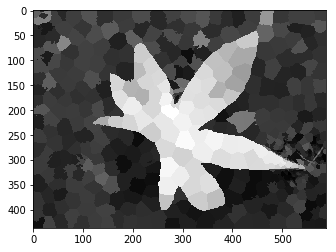

In [5]:
#display image
plt.imshow(plotImage(distribution, labels), cmap='gray')
plt.show()

In [6]:
# save data
save('distribution', distribution)